# Project Group-3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import KFold

In [2]:
data=pd.read_csv("C:\ExcelR\project data\cars_data.csv")

In [3]:
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
#Data Structure
data.shape

(38531, 30)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

# EDA

### Finding Duplicates and removing them

In [6]:
# Counting Duplicated rows
data[data.duplicated()].shape

(40, 30)

In [7]:
# Printing Duplicated row
data[data.duplicated()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
5767,Mitsubishi,Lancer,automatic,black,250000,2003,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,False,50
6556,Citroen,Xantia,mechanical,silver,520000,1998,diesel,False,diesel,2.1,...,True,False,False,False,False,False,False,False,False,16
9996,Ford,Scorpio,mechanical,yellow,55555,1995,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,1
11380,Ford,Transit,mechanical,grey,700000,2005,diesel,False,diesel,2.4,...,False,False,False,False,False,False,False,False,False,60
11704,Ford,Mondeo,mechanical,green,380000,1998,diesel,False,diesel,1.8,...,False,False,False,False,True,False,False,True,True,67
12810,Renault,19,mechanical,blue,99999,1992,gasoline,False,gasoline,1.7,...,False,False,False,False,False,False,False,False,False,3
17338,Volkswagen,Touareg,automatic,grey,337400,2008,diesel,False,diesel,2.5,...,True,True,False,False,True,False,False,True,True,11
18184,Volkswagen,Passat,mechanical,black,157000,2008,gasoline,False,gasoline,1.8,...,True,True,True,True,True,False,True,True,True,42
31993,Skoda,Rapid,automatic,silver,0,2019,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,3
32017,Skoda,Rapid,mechanical,blue,0,2019,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,3


In [8]:
data_cleaned1=data.drop_duplicates()

In [9]:
data_cleaned1.shape

(38491, 30)

### Droping Unnecessary Columns

In [10]:
data2=data_cleaned1.drop(data_cleaned1.iloc[:,19:30],axis=1)
data2

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156


### Renaming Columns

In [11]:
data3=data2.rename({'price_usd':'price','location_region':'loc','number_of_photos':'photos','odometer_value':'KM'},axis=1)

In [12]:
data3

,manufacturer_name,model_name,transmission,color,KM,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price,is_exchangeable,loc,photos,up_counter
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156


In [13]:
# As in data the column 'loc' has string values in russian language so for our convenience we will tranlate them
data3['loc'].replace(('Минская обл.','Гомельская обл.','Витебская обл.','Брестская обл.','Могилевская обл.','Гродненская обл.'),('Minsk region','Gomel region','Vitebsk region','Brest region','Mogilev region','Grodno region'),inplace=True)

### Data Validations

<AxesSubplot:xlabel='price', ylabel='Count'>

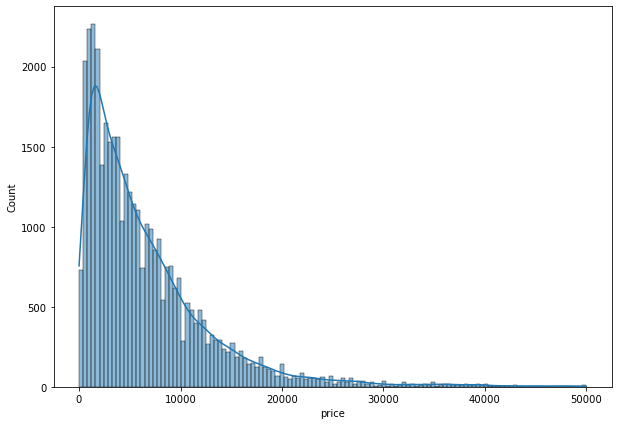

In [14]:
# Histogram of Pice
plt.figure(figsize=(10,7))
sns.histplot(x='price',data=data3,kde=True)

##### As graph shows, price of cars is positively skewed, hence most of the datapoints are less than the median

<AxesSubplot:xlabel='KM', ylabel='Count'>

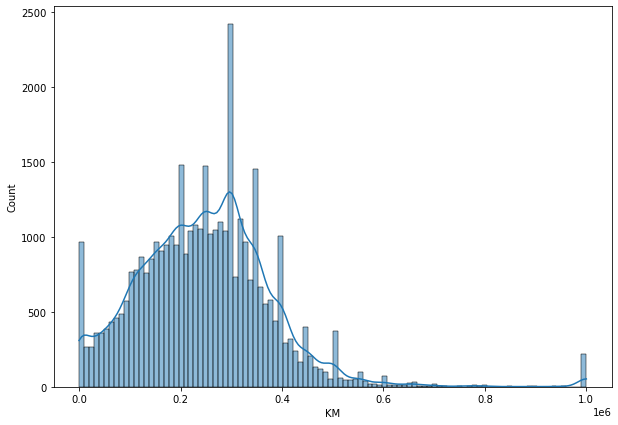

In [15]:
# Histogram of KM driven
plt.figure(figsize=(10,7))
sns.histplot(x='KM',data=data3,kde=True)

##### As graph shows, odometer values(KM) of cars is positively skewed , hence most of the datapoints are less than the median.   

<Figure size 720x504 with 0 Axes>

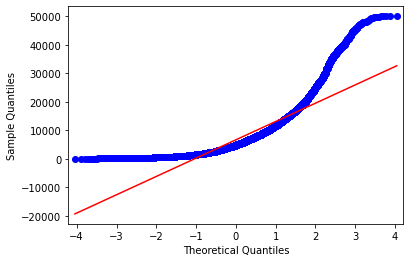

In [16]:
# QQ plot
plt.figure(figsize=(10,7))
sn.qqplot(data3['price'],line='s')
plt.show()

###### As figure shows, majority of datapoints do not  lie on the line therefore data is non-normal.

<Figure size 720x504 with 0 Axes>

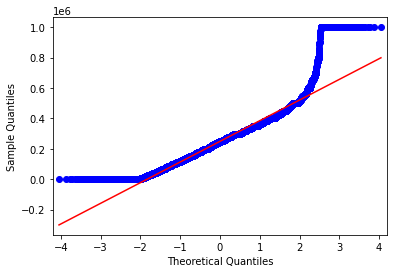

In [17]:
# QQ plot
plt.figure(figsize=(10,7))
sn.qqplot(data3['KM'],line='s')
plt.show()

###### As figure shows, majority of datapoints lie on the line therefore data is normally distributed,

<AxesSubplot:>

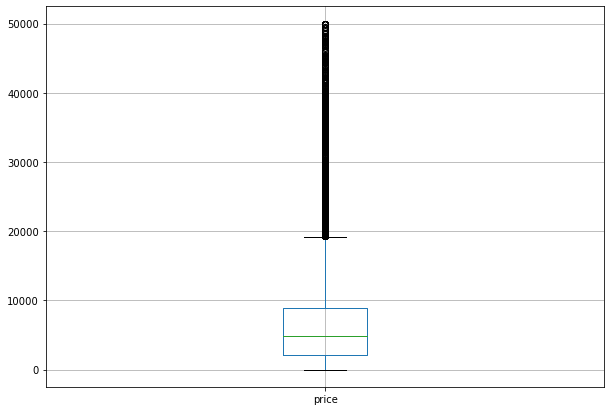

In [18]:
# Box plot of price
plt.figure(figsize=(10,7))
data3.boxplot(column=['price'])

##### As box plot shows, outliers of price column are on right tail( positive tail)

<AxesSubplot:>

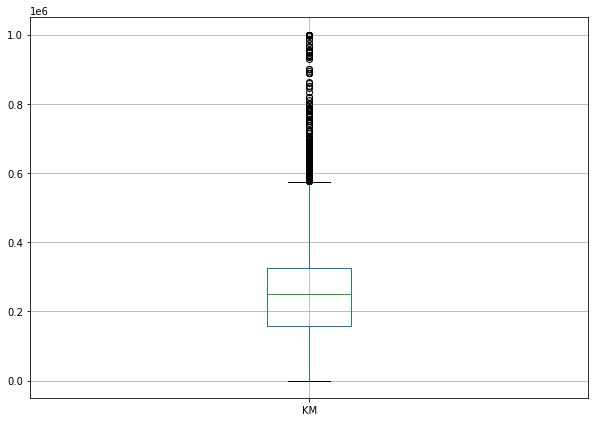

In [19]:
# Box plot of KM Driven
plt.figure(figsize=(10,7))
data3.boxplot(column=['KM'])

##### As box plot shows, outliers of odometer value(KM) column are on right tail( positive tail)

### Missing values and Imputation 

In [20]:
data3[data3.isnull().any(axis=1)].head()

,manufacturer_name,model_name,transmission,color,KM,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price,is_exchangeable,loc,photos,up_counter
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,hatchback,False,owned,front,14900.0,True,Minsk region,11,13
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,hatchback,False,owned,front,16000.0,False,Minsk region,18,1
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,liftback,False,owned,front,12950.0,True,Minsk region,21,5
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,hatchback,False,owned,front,13850.0,False,Minsk region,20,57
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,hatchback,False,owned,front,9300.0,True,Minsk region,7,21


In [21]:
data3.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
KM                    0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price                 0
is_exchangeable       0
loc                   0
photos                0
up_counter            0
dtype: int64

##### There is only one columns with NaN values and its data type is float64 therfore we will replace NaN values with that column's mean


In [22]:
mean=data3['engine_capacity'].mean()
data3['engine_capacity']=data3['engine_capacity'].fillna(mean)

In [23]:
data3

,manufacturer_name,model_name,transmission,color,KM,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price,is_exchangeable,loc,photos,up_counter
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Minsk region,9,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Minsk region,12,54
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Minsk region,4,72
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Minsk region,9,42
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Gomel region,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Minsk region,5,85
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Brest region,4,20
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Minsk region,3,63
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Brest region,7,156


In [24]:
data_loc=data3.copy()

# Scatter Plot And Correlation Analysis

## Data after using Label Encoder and Dummies

In [25]:
# Converting string data type to numerical for calculations
c=[ 'manufacturer_name','transmission', 'color','engine_fuel','engine_type','body_type','state', 'drivetrain','loc']
data3[c]=data3[c].apply(LabelEncoder().fit_transform)

In [26]:
data3

,manufacturer_name,model_name,transmission,color,KM,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price,is_exchangeable,loc,photos,up_counter
0,45,Outback,0,8,190000,2010,3,False,2,2.5,10,False,2,0,10900.00,False,3,9,13
1,45,Outback,0,1,290000,2002,3,False,2,3.0,10,False,2,0,5000.00,True,3,12,54
2,45,Forester,0,7,402000,2001,3,False,2,2.5,9,False,2,0,2800.00,True,3,4,72
3,45,Impreza,1,1,10000,1999,3,False,2,3.0,8,False,2,0,9999.00,True,3,9,42
4,45,Legacy,0,0,280000,2001,3,False,2,2.5,10,False,2,0,2134.11,True,1,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,8,300,0,8,290000,2000,3,False,2,3.5,8,False,2,1,2750.00,True,3,5,85
38527,8,PT Cruiser,1,1,321000,2004,0,False,0,2.2,2,False,2,1,4800.00,True,0,4,20
38528,8,300,0,1,777957,2000,3,False,2,3.5,8,False,2,1,4300.00,False,3,3,63
38529,8,PT Cruiser,1,0,20000,2001,3,False,2,2.0,6,False,2,1,4000.00,True,0,7,156


In [27]:
#Creating dummy variable for Weather column
data4=pd.get_dummies(data3,columns=['engine_has_gas','has_warranty','is_exchangeable'])

In [28]:
data4['Price']=data4['price']
data5=data4.drop(['price','model_name'],axis=1)
data5

,manufacturer_name,transmission,color,KM,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,...,loc,photos,up_counter,engine_has_gas_False,engine_has_gas_True,has_warranty_False,has_warranty_True,is_exchangeable_False,is_exchangeable_True,Price
0,45,0,8,190000,2010,3,2,2.5,10,2,...,3,9,13,1,0,1,0,1,0,10900.00
1,45,0,1,290000,2002,3,2,3.0,10,2,...,3,12,54,1,0,1,0,0,1,5000.00
2,45,0,7,402000,2001,3,2,2.5,9,2,...,3,4,72,1,0,1,0,0,1,2800.00
3,45,1,1,10000,1999,3,2,3.0,8,2,...,3,9,42,1,0,1,0,0,1,9999.00
4,45,0,0,280000,2001,3,2,2.5,10,2,...,1,14,7,1,0,1,0,0,1,2134.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,8,0,8,290000,2000,3,2,3.5,8,2,...,3,5,85,1,0,1,0,0,1,2750.00
38527,8,1,1,321000,2004,0,0,2.2,2,2,...,0,4,20,1,0,1,0,0,1,4800.00
38528,8,0,1,777957,2000,3,2,3.5,8,2,...,3,3,63,1,0,1,0,1,0,4300.00
38529,8,1,0,20000,2001,3,2,2.0,6,2,...,0,7,156,1,0,1,0,0,1,4000.00


<AxesSubplot:xlabel='KM', ylabel='price'>

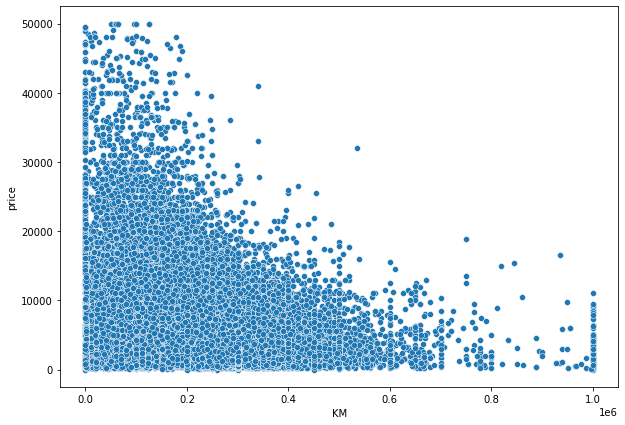

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='KM',y='price',data=data3)

#### The price of cars and odometer values are  inversely proportional.

<AxesSubplot:>

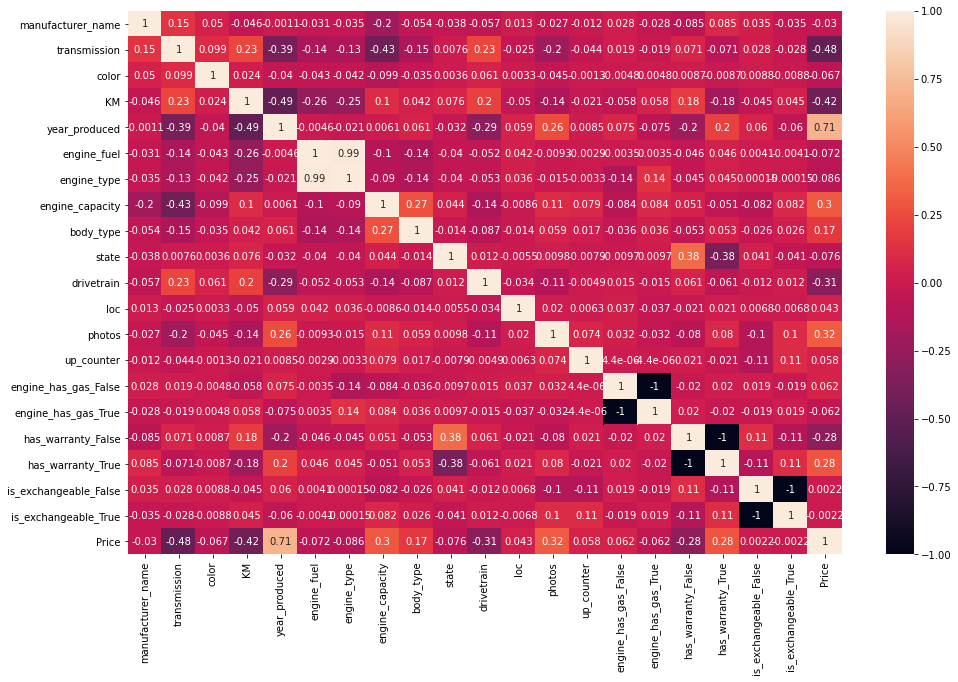

In [30]:
corr=data5.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)

#### As heatmap shows, transmission, odometer value(KM) and drivetrain columns are Negatively correlated. where as year produced, engine capaciity and number of  photos are Positively correlated with Price of the Car

# Graphical Representation 

<AxesSubplot:ylabel='loc'>

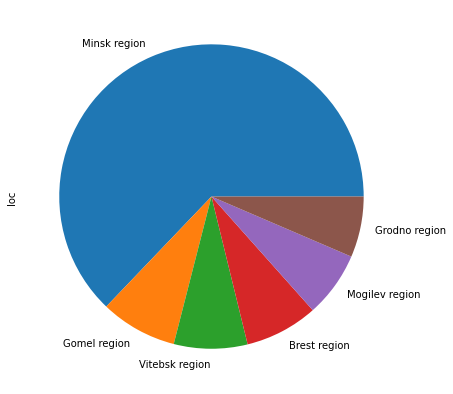

In [31]:
plt.figure(figsize=(10,7))
data_loc['loc'].value_counts().plot(kind='pie')

##### As pie diagram shows, more tha 65% of cars are from Minsk Region

<AxesSubplot:xlabel='engine_fuel', ylabel='KM'>

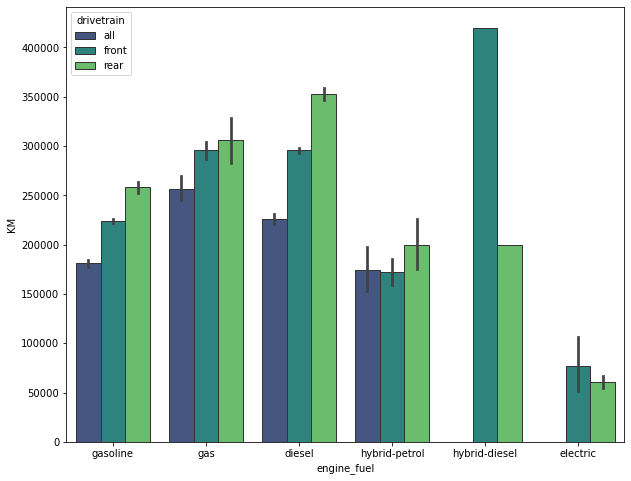

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x='engine_fuel',y='KM',data=data_loc,hue='drivetrain',palette='viridis',edgecolor='0.2')

#### 1. This barplot shows us that, the cars with hybrid-diesel fuel engine has traveled more distance than others.
#### 2, Also we can say that the least traveled cars belong to electric engine as it has only rare users as of now.

<AxesSubplot:>

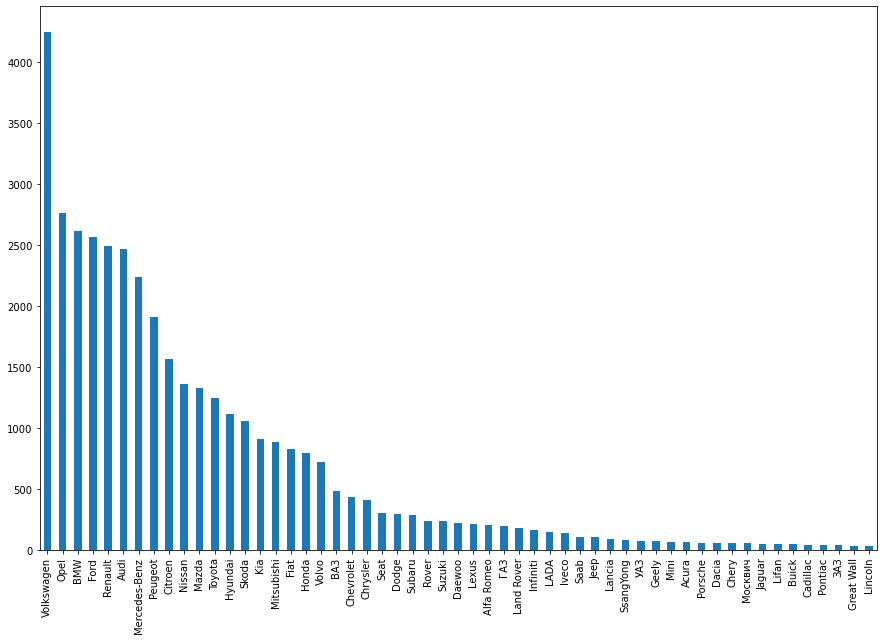

In [33]:
plt.figure(figsize=(15,10))
data_loc['manufacturer_name'].value_counts().plot(kind='bar')

#### We can say that Volkswagen manufactured cars are listed on the portal most frequently. which also says that it has one of the largest market in region 

# Model Building and Finding Best Model 

In [34]:
data5

,manufacturer_name,transmission,color,KM,year_produced,engine_fuel,engine_type,engine_capacity,body_type,state,...,loc,photos,up_counter,engine_has_gas_False,engine_has_gas_True,has_warranty_False,has_warranty_True,is_exchangeable_False,is_exchangeable_True,Price
0,45,0,8,190000,2010,3,2,2.5,10,2,...,3,9,13,1,0,1,0,1,0,10900.00
1,45,0,1,290000,2002,3,2,3.0,10,2,...,3,12,54,1,0,1,0,0,1,5000.00
2,45,0,7,402000,2001,3,2,2.5,9,2,...,3,4,72,1,0,1,0,0,1,2800.00
3,45,1,1,10000,1999,3,2,3.0,8,2,...,3,9,42,1,0,1,0,0,1,9999.00
4,45,0,0,280000,2001,3,2,2.5,10,2,...,1,14,7,1,0,1,0,0,1,2134.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,8,0,8,290000,2000,3,2,3.5,8,2,...,3,5,85,1,0,1,0,0,1,2750.00
38527,8,1,1,321000,2004,0,0,2.2,2,2,...,0,4,20,1,0,1,0,0,1,4800.00
38528,8,0,1,777957,2000,3,2,3.5,8,2,...,3,3,63,1,0,1,0,1,0,4300.00
38529,8,1,0,20000,2001,3,2,2.0,6,2,...,0,7,156,1,0,1,0,0,1,4000.00


In [35]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38491 entries, 0 to 38530
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   manufacturer_name      38491 non-null  int32  
 1   transmission           38491 non-null  int32  
 2   color                  38491 non-null  int32  
 3   KM                     38491 non-null  int64  
 4   year_produced          38491 non-null  int64  
 5   engine_fuel            38491 non-null  int32  
 6   engine_type            38491 non-null  int32  
 7   engine_capacity        38491 non-null  float64
 8   body_type              38491 non-null  int32  
 9   state                  38491 non-null  int32  
 10  drivetrain             38491 non-null  int32  
 11  loc                    38491 non-null  int32  
 12  photos                 38491 non-null  int64  
 13  up_counter             38491 non-null  int64  
 14  engine_has_gas_False   38491 non-null  uint8  
 15  en

### We will use feature seletion processes to find which features are more useful for model selection

In [36]:
x=data5.iloc[:,0:20]
y=data5.iloc[:,20]

In [37]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [38]:
test=SelectKBest(score_func=mutual_info_regression, k='all')
fit=test.fit(x,y)
print(fit.scores_)

[0.17679467 0.14889328 0.10243671 0.24069229 0.69539615 0.02724082
 0.02530001 0.16454512 0.14743013 0.04548505 0.10178726 0.03571247
 0.09905887 0.02633962 0.00761994 0.00485601 0.03296181 0.03875517
 0.01734674 0.02604089]


Feature 0: 0.176795
Feature 1: 0.148893
Feature 2: 0.102437
Feature 3: 0.240692
Feature 4: 0.695396
Feature 5: 0.027241
Feature 6: 0.025300
Feature 7: 0.164545
Feature 8: 0.147430
Feature 9: 0.045485
Feature 10: 0.101787
Feature 11: 0.035712
Feature 12: 0.099059
Feature 13: 0.026340
Feature 14: 0.007620
Feature 15: 0.004856
Feature 16: 0.032962
Feature 17: 0.038755
Feature 18: 0.017347
Feature 19: 0.026041


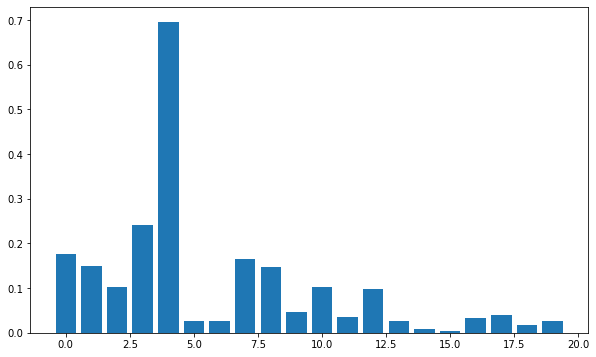

In [39]:
for i in range(len(fit.scores_)):
    print('Feature %d: %f' % (i, fit.scores_[i]))
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)
plt.show()

###### Here we are going to take those features( columns ) who's score is greater than 0.1
###### That are --- 
###### 1.manufacturer_name
###### 2.transmission 
###### 3.color
###### 4.KM
###### 5.year_produced
###### 6.engine_capacity 
###### 7.body_type
###### 8.drivetrain
###### 9.photos

##### Therefore we will create new dataframe consist of only above columns for further ease of use

In [40]:
data_model=pd.DataFrame(data5[['manufacturer_name', 'transmission', 'color', 'KM', 'year_produced','engine_capacity', 'body_type','drivetrain','photos','Price']])

In [41]:
data_model

,manufacturer_name,transmission,color,KM,year_produced,engine_capacity,body_type,drivetrain,photos,Price
0,45,0,8,190000,2010,2.5,10,0,9,10900.00
1,45,0,1,290000,2002,3.0,10,0,12,5000.00
2,45,0,7,402000,2001,2.5,9,0,4,2800.00
3,45,1,1,10000,1999,3.0,8,0,9,9999.00
4,45,0,0,280000,2001,2.5,10,0,14,2134.11
...,...,...,...,...,...,...,...,...,...,...
38526,8,0,8,290000,2000,3.5,8,1,5,2750.00
38527,8,1,1,321000,2004,2.2,2,1,4,4800.00
38528,8,0,1,777957,2000,3.5,8,1,3,4300.00
38529,8,1,0,20000,2001,2.0,6,1,7,4000.00


In [42]:
Data=data_model.copy()

### Building models

In [43]:
## Spliting whole data in 67:33 ratio using Train-Test split
from sklearn.model_selection import train_test_split
x=data_model.iloc[:,0:9]
y=data_model.iloc[:,9]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

### 1. Linear Regression 

In [45]:
## importing required libraries 
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2

In [46]:
lr=LinearRegression()
lr_m=lr.fit(x_train,y_train)
y_pred_lr=lr_m.predict(x_test)
y_pred_lr

array([ 9523.43272986,  -326.979542  ,  1150.48770238, ...,
        8489.99746521,  8480.58494962, 19201.18096512])

In [47]:
print('Mean Squared Error:', round(mse(y_test,y_pred_lr),2))
print('Root Mean Squared Error:', round(np.sqrt(mse(y_test,y_pred_lr)),2))
print('Accuracy',round((lr_m.score(x_train,y_train))*100,2))

Mean Squared Error: 15721091.19
Root Mean Squared Error: 3964.98
Accuracy 62.14


### 2. Random Forest 

In [48]:
## Importing required libraries
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics

In [49]:
regressor=RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)

In [50]:
print('Mean Squared Error:', round(mse(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(mse(y_test, y_pred)),2))
print('Accuracy',round((regressor.score(x_train,y_train))*100,2))

Mean Squared Error: 4382494.52
Root Mean Squared Error: 2093.44
Accuracy 98.58


In [51]:
# Get numerical feature importances
feature_list = list(data_model.columns)
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: year_produced        Importance: 0.62
Variable: engine_capacity      Importance: 0.18
Variable: KM                   Importance: 0.06
Variable: manufacturer_name    Importance: 0.04
Variable: drivetrain           Importance: 0.04
Variable: body_type            Importance: 0.02
Variable: photos               Importance: 0.02
Variable: transmission         Importance: 0.01
Variable: color                Importance: 0.01


[None, None, None, None, None, None, None, None, None]

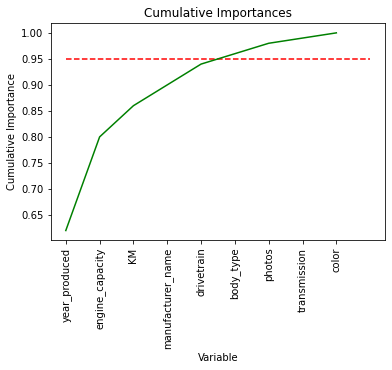

In [52]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
x_values = list(range(len(importances)))
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [53]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 6


In [54]:
### Now we will check how accurate model will be with only those 6 feature
data_fe=pd.DataFrame(data_model[['manufacturer_name','KM', 'year_produced','engine_capacity', 'body_type','drivetrain','Price']])
data_fe

,manufacturer_name,KM,year_produced,engine_capacity,body_type,drivetrain,Price
0,45,190000,2010,2.5,10,0,10900.00
1,45,290000,2002,3.0,10,0,5000.00
2,45,402000,2001,2.5,9,0,2800.00
3,45,10000,1999,3.0,8,0,9999.00
4,45,280000,2001,2.5,10,0,2134.11
...,...,...,...,...,...,...,...
38526,8,290000,2000,3.5,8,1,2750.00
38527,8,321000,2004,2.2,2,1,4800.00
38528,8,777957,2000,3.5,8,1,4300.00
38529,8,20000,2001,2.0,6,1,4000.00


In [55]:
## Again splitting data in 67:33 ratio
x1=data_fe.iloc[:,0:6]
y1=data_fe.iloc[:,6]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.33,random_state=1)

In [56]:
regressor1=RandomForestRegressor(n_estimators=200, random_state=0)
regressor1.fit(x1_train,y1_train)
y_pred_fe=regressor1.predict(x1_test)

In [57]:
print('Mean Squared Error:', round(mse(y1_test, y_pred_fe),2))
print('Root Mean Squared Error:', round(np.sqrt(mse(y1_test, y_pred_fe)),2))
print('Accuracy',round((regressor1.score(x1_train,y1_train))*100,2))

Mean Squared Error: 4007239.76
Root Mean Squared Error: 2001.81
Accuracy 98.44


### 3. Ridge Regression

In [58]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 
import seaborn as sns

In [59]:
ridgeR=Ridge(alpha = 1) 
ridgeR.fit(x_train,y_train) 
y_pred_rd=ridgeR.predict(x_test)

In [60]:
print('Mean Squared Error:', round(mse(y_test, y_pred_rd),2))
print('Root Mean Squared Error:', round(np.sqrt(mse(y_test, y_pred_rd)),2))
print('Accuracy',round((ridgeR.score(x_train,y_train))*100,2))

Mean Squared Error: 15719570.25
Root Mean Squared Error: 3964.79
Accuracy 62.14


In [61]:
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

             Columns  Coefficient Estimate
0  manufacturer_name            603.710051
1       transmission          -1225.326650
2              color            -30.412354
3                 KM          -6107.874563
4      year_produced          34363.103332
5    engine_capacity          17167.600115
6          body_type           1319.649247
7         drivetrain          -1237.533395
8             photos           8971.467632


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

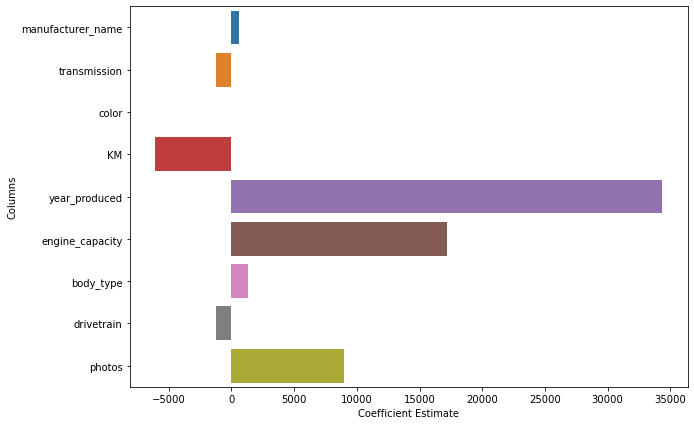

In [62]:
plt.figure(figsize=(10,7))
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

### 4. LASSO Regression

In [63]:
## Importing required library
from sklearn.linear_model import Lasso

In [64]:
lasso=Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred_ls=lasso.predict(x_test)

In [65]:
print('Mean Squared Error:', round(mse(y_test, y_pred_ls),2))
print('Root Mean Squared Error:', round(np.sqrt(mse(y_test, y_pred_ls)),2))
print('Accuracy',round((lasso.score(x_train,y_train))*100,2))

Mean Squared Error: 15718821.22
Root Mean Squared Error: 3964.7
Accuracy 62.14


In [66]:
# get LASSO coefficient and print them 
lasso_coefficient = pd.DataFrame() 
lasso_coefficient["Columns"]= x.columns 
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_) 
print(lasso_coefficient) 

             Columns  Coefficient Estimate
0  manufacturer_name            590.694844
1       transmission          -1224.627398
2              color            -23.101609
3                 KM          -6037.695732
4      year_produced          34473.779153
5    engine_capacity          17136.278230
6          body_type           1307.446215
7         drivetrain          -1226.682634
8             photos           8833.889582


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

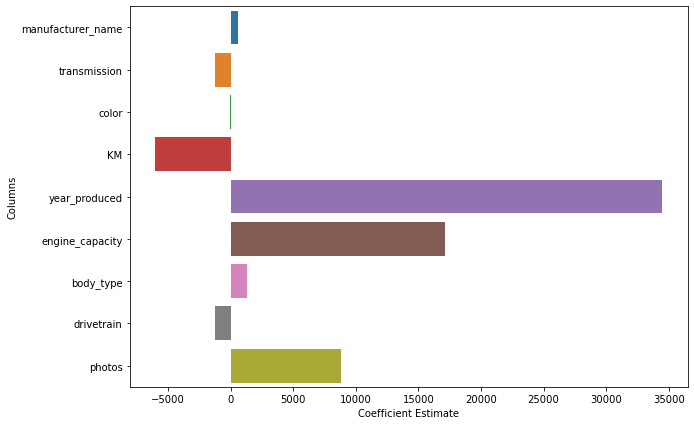

In [67]:
plt.figure(figsize=(10,7))
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coefficient)

### 5. KNN 

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [69]:
rmse_val = [] #to store rmse values for different k
for K in range(1,40):
    model=KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(mse(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3661.9790174555624
RMSE value for k=  2 is: 3262.0248642154447
RMSE value for k=  3 is: 3138.871455855922
RMSE value for k=  4 is: 3074.4357529403933
RMSE value for k=  5 is: 3064.7454197238594
RMSE value for k=  6 is: 3070.592699924279
RMSE value for k=  7 is: 3086.8886373459336
RMSE value for k=  8 is: 3098.6153279629234
RMSE value for k=  9 is: 3111.996581016519
RMSE value for k=  10 is: 3121.366952436588
RMSE value for k=  11 is: 3132.110077514221
RMSE value for k=  12 is: 3144.643576721409
RMSE value for k=  13 is: 3163.5830982957377
RMSE value for k=  14 is: 3176.9493628241967
RMSE value for k=  15 is: 3193.2795255788824
RMSE value for k=  16 is: 3208.109850344038
RMSE value for k=  17 is: 3215.8132217964403
RMSE value for k=  18 is: 3223.0412227455477
RMSE value for k=  19 is: 3238.581621495094
RMSE value for k=  20 is: 3246.982051108784
RMSE value for k=  21 is: 3256.7237743976784
RMSE value for k=  22 is: 3271.2138259955786
RMSE value for k=  23 is: 32

<AxesSubplot:>

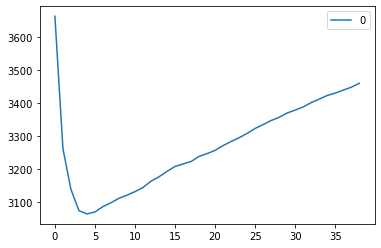

In [70]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

RMSE value for K=5 is optimal. which is 3064.75

In [71]:
## Building model for k=5
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_preds_kn=knn.predict(x_test)

In [72]:
print('Mean Squared Error:', round(mse(y_test, y_preds_kn),2))
print('Root Mean Squared Error:', round(np.sqrt(mse(y_test, y_preds_kn)),2))
print('Accuracy',round((knn.score(x_train,y_train))*100,2))

Mean Squared Error: 9392664.49
Root Mean Squared Error: 3064.75
Accuracy 85.91


In [73]:
## Creating Dataframe of all models scores
scores={'Models':['Linear Reg','Random forest','RF features','Ridge Reg','LASSO Reg','KNN'],
       'RMSE':[3964.98,2093.64,2002.03,3964.79,3964.70,3064.75],
       'Accuracy(%)':[62.14,98.52,98.44,62.14,62.14,85.91]}
results=pd.DataFrame(scores)

In [74]:
results

,Models,RMSE,Accuracy(%)
0,Linear Reg,3964.98,62.14
1,Random forest,2093.64,98.52
2,RF features,2002.03,98.44
3,Ridge Reg,3964.79,62.14
4,LASSO Reg,3964.70,62.14
5,KNN,3064.75,85.91


## Final Model- Random Forest with features

In [80]:
data_model

,manufacturer_name,transmission,color,KM,year_produced,engine_capacity,body_type,drivetrain,photos,Price
0,45,0,8,190000,2010,2.5,10,0,9,10900.00
1,45,0,1,290000,2002,3.0,10,0,12,5000.00
2,45,0,7,402000,2001,2.5,9,0,4,2800.00
3,45,1,1,10000,1999,3.0,8,0,9,9999.00
4,45,0,0,280000,2001,2.5,10,0,14,2134.11
...,...,...,...,...,...,...,...,...,...,...
38526,8,0,8,290000,2000,3.5,8,1,5,2750.00
38527,8,1,1,321000,2004,2.2,2,1,4,4800.00
38528,8,0,1,777957,2000,3.5,8,1,3,4300.00
38529,8,1,0,20000,2001,2.0,6,1,7,4000.00


In [81]:
X=data_model.iloc[:,0:9]
Y=data_model.iloc[:,9]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [82]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [84]:
final=RandomForestRegressor(n_estimators=200, random_state=0)
final.fit(X_train,Y_train)
y_pred_final=final.predict(X_test)

In [85]:
print('Mean Squared Error:', round(mse(Y_test, y_pred_final),2))
print('Root Mean Squared Error:', round(np.sqrt(mse(Y_test, y_pred_final)),2))
print('Accuracy',round((final.score(X_train,Y_train))*100,2))

Mean Squared Error: 4382494.52
Root Mean Squared Error: 2093.44
Accuracy 98.58
